In [31]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [101]:
data = pd.read_csv('datasetHT.csv')

In [102]:
# Load the dataset
data = pd.read_csv('datasetHT.csv')

# Check for missing values before cleaning
print("Missing values per column before cleaning:")
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Verify if all missing values are removed
total_missing = data.isnull().sum().sum()

# Print results
if total_missing == 0:
    print("\nAll missing values have been successfully removed.")
else:
    print(f"\nWarning: There are still {total_missing} missing values remaining.")

# Display the cleaned data summary
print("\nSummary of the cleaned data:")
print(data.info())

# Display the first few rows of the cleaned data
print("\nFirst few rows of the cleaned dataset:")
print(data.head())

Missing values per column before cleaning:
directory.id               0
Subject                    0
RID                        0
Image.Data.ID              0
Modality                   0
Visit                      0
Acq.Date                   0
DX.bl                      0
EXAMDATE                   0
AGE                        0
PTGENDER                   0
PTEDUCAT                   0
PTETHCAT                   0
PTRACCAT                   0
APOE4                      0
MMSE                       0
imputed_genotype           1
APOE Genotype              0
Dx Codes for Submission    0
dtype: int64

All missing values have been successfully removed.

Summary of the cleaned data:
<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 0 to 627
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   directory.id             627 non-null    object 
 1   Subject                  627 non-null    obj

In [37]:
data.head(3)

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,09-01-2005,AD,09-12-2005,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11-08-2005,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,09-02-2005,CN,09-07-2005,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN


In [103]:
# Assign features and target variable
X = data
Y = data['DX.bl']  # Extract target variable

# Define columns to remove
remove_columns = list(X.columns[:9])  # First 9 columns
if 'Dx Codes for Submission' in X.columns:  # Check if column exists
    remove_columns.append('Dx Codes for Submission')

print("Removing columns:", remove_columns)

# Drop the unwanted columns from X
X = X.drop(columns=remove_columns, errors='ignore')  # Avoid errors if columns are missing

# List the remaining features
features = list(X.columns)
print("\nRemaining features:", features)

# Display the first 5 rows of the updated X
print("\nFirst 5 rows of the updated features (X):")
X.head(5)

Removing columns: ['directory.id', 'Subject', 'RID', 'Image.Data.ID', 'Modality', 'Visit', 'Acq.Date', 'DX.bl', 'EXAMDATE', 'Dx Codes for Submission']

Remaining features: ['AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'APOE4', 'MMSE', 'imputed_genotype', 'APOE Genotype']

First 5 rows of the updated features (X):


,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype
0,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4"
1,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3"
2,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3"
3,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3"
4,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4"


AGE      float64
DX.bl       int8
dtype: object


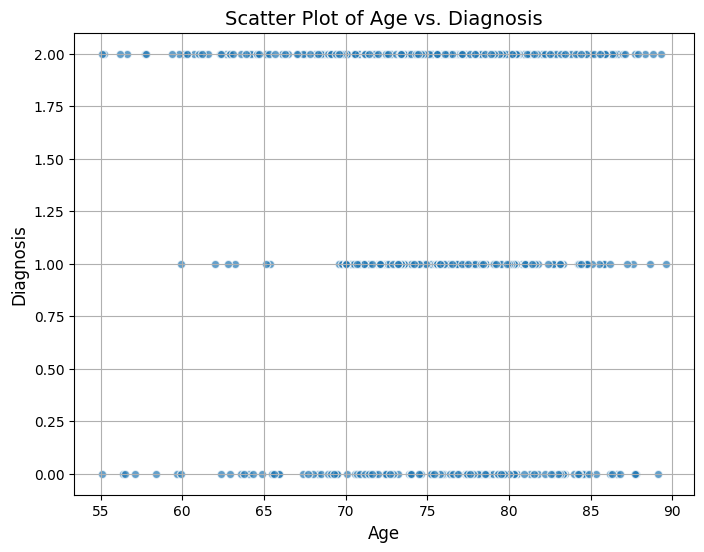

In [88]:
# Relationship between age and diagnosis (DX.bl) by plotting a scatterplot of age against diagnosis.

# Check the data types of the columns
print(data[['AGE', 'DX.bl']].dtypes)


# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['AGE'], data['DX.bl'], alpha=0.7, edgecolors='w')  # Add transparency and edge color
plt.xlabel('Age', fontsize=12)
plt.ylabel('Diagnosis', fontsize=12)
plt.title('Scatter Plot of Age vs. Diagnosis', fontsize=14)
plt.grid(True)  # Add a grid for better readability
plt.show()

MMSE     int64
DX.bl     int8
dtype: object


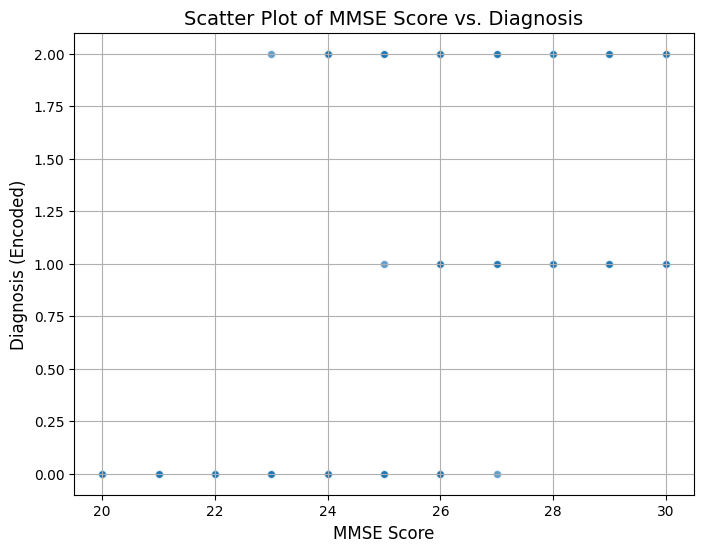

In [89]:
# Check data types for the columns
print(data[['MMSE', 'DX.bl']].dtypes)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['MMSE'], data['DX.bl'], alpha=0.7, edgecolors='w')
plt.xlabel('MMSE Score', fontsize=12)
plt.ylabel('Diagnosis (Encoded)', fontsize=12)
plt.title('Scatter Plot of MMSE Score vs. Diagnosis', fontsize=14)
plt.grid(True)
plt.show()

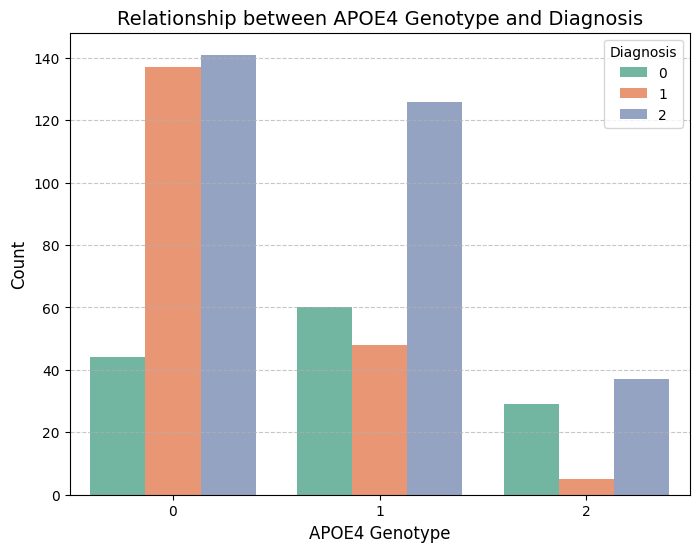

In [90]:
# Relationship between APOE and Diagnosis
if 'APOE4' in data.columns and 'DX.bl' in data.columns:
    # Create the count plot
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
    sns.countplot(x='APOE4', hue='DX.bl', data=data, palette='Set2')  #color palette
    plt.title('Relationship between APOE4 Genotype and Diagnosis', fontsize=14)
    plt.xlabel('APOE4 Genotype', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Diagnosis', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  #Add a grid
    plt.show()
else:
    print("Columns 'APOE4' and/or 'DX.bl' are missing in the dataset.")


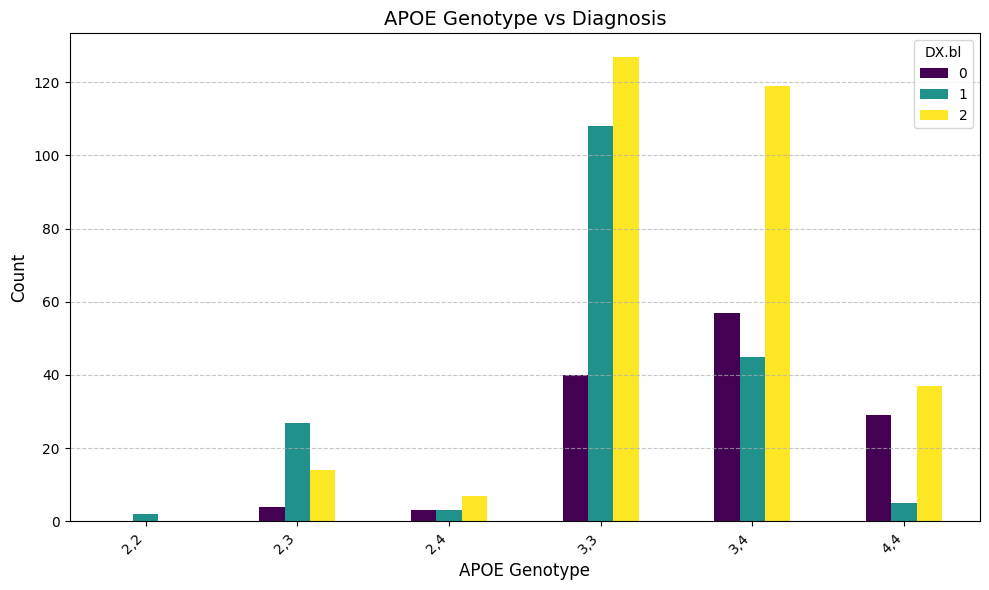

In [92]:
# APOE Genotype vs Diagnosis

# Group the data and create a bar plot
if 'APOE Genotype' in data.columns and 'DX.bl' in data.columns:
    ax = (
        data.groupby(['APOE Genotype', 'DX.bl'])
        .size()
        .unstack(fill_value=0)  # Ensures missing combinations are filled with 0
        .plot(kind='bar', figsize=(10, 6), colormap='viridis')  # Use a colormap 
    )

    # Set plot title and labels
    ax.set_title('APOE Genotype vs Diagnosis', fontsize=14)
    ax.set_xlabel('APOE Genotype', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add grid 
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("Columns 'APOE Genotype' and/or 'DX.bl' are missing in the dataset.")

Numerical Variable Distributions:



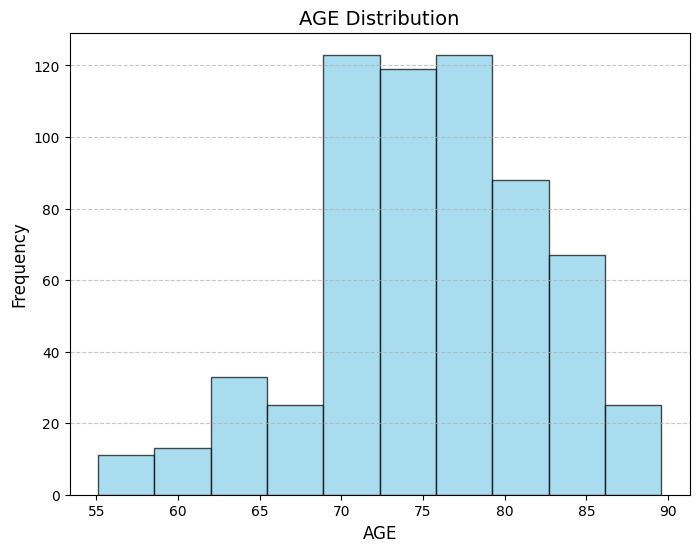


Summary statistics for AGE:
count    627.000000
mean      75.161882
std        6.689979
min       55.100000
25%       71.200000
50%       75.400000
75%       80.000000
max       89.600000
Name: AGE, dtype: float64
--------------------------------------------------


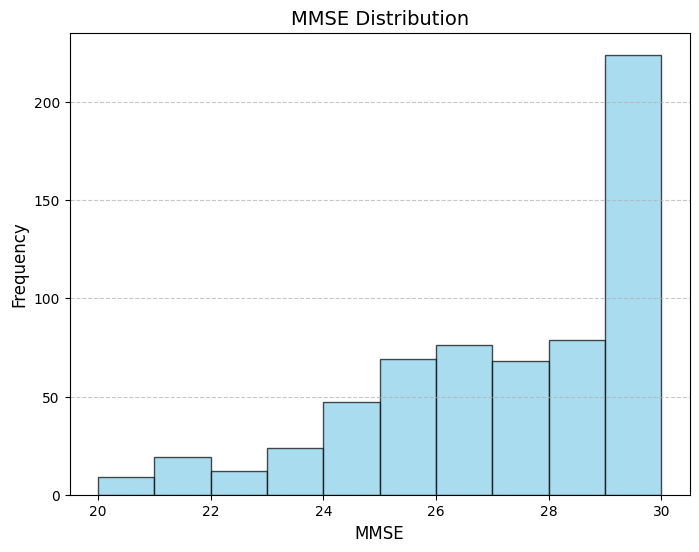


Summary statistics for MMSE:
count    627.000000
mean      26.921850
std        2.563934
min       20.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       30.000000
Name: MMSE, dtype: float64
--------------------------------------------------


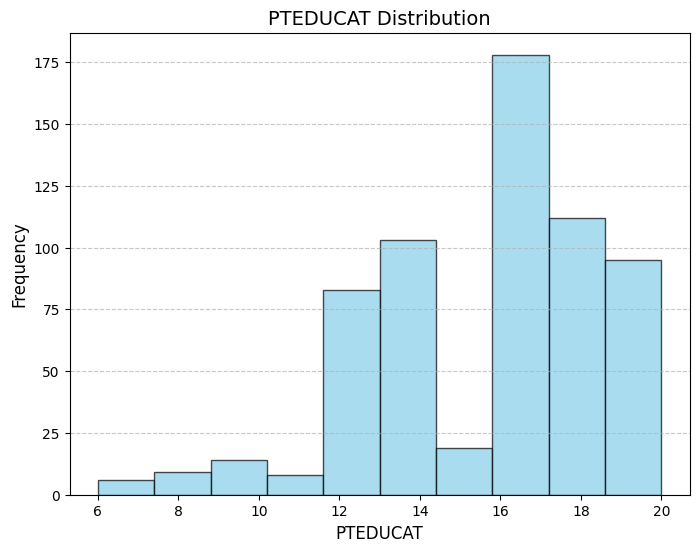


Summary statistics for PTEDUCAT:
count    627.000000
mean      15.612440
std        2.978845
min        6.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       20.000000
Name: PTEDUCAT, dtype: float64
--------------------------------------------------


In [93]:
# Numerical Variable Distributions
print('Numerical Variable Distributions:\n')

for var in numerical_vars:
    if var in X.columns:
        # Plot histogram
        plt.figure(figsize=(8, 6))  # Set figure size 
        plt.hist(X[var].dropna(), bins=10, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'{var} Distribution', fontsize=14)
        plt.xlabel(var, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Display summary statistics
        print(f'\nSummary statistics for {var}:')
        print(X[var].describe())
        print('-' * 50)
    else:
        print(f'\nVariable {var} is not found in the dataset.')

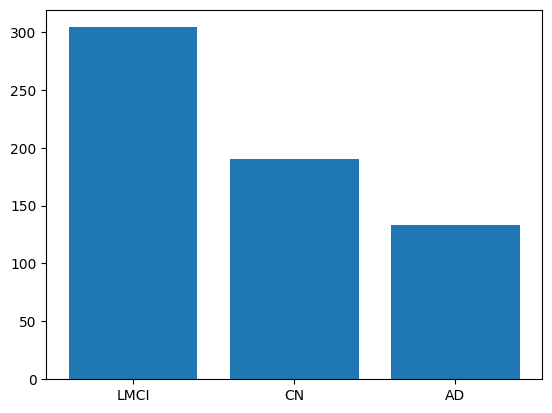

In [106]:
# Analyzing target (y) distribution
plt.bar(Y.value_counts().index, Y.value_counts())
plt.show()

In [107]:
# Normalization
def normalize(X):
    X = np.array(X)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    normalized_X = (X - means) / stds

    print('Normalizing:')
    for i, (mean, std) in enumerate(zip(means, stds)):
        print(f'  Variable {i+1}: Mean = {mean:.2f}, Standard Deviation = {std:.2f}')

    return normalized_X

In [109]:
# Spliting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

num_test = X_test.shape[0]

In [110]:
# Comparing Models
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

Cross-Validation Score: 71.26%
Accuracy: 65.08%
Precision: 67.80%
Recall: 65.08%
F1 Score: 65.40%

Confusion Matrix:


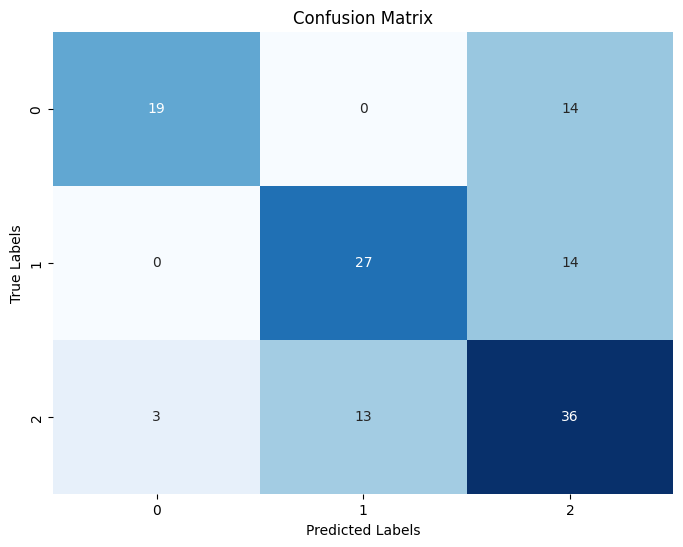

In [113]:
# Initialize Linear Discriminant Analysis
lda_clf = LinearDiscriminantAnalysis(
    solver='svd',
    store_covariance=False,
    tol=0.0001
)

# Train the model
lda_clf.fit(X_train, y_train)

# Make predictions
y_pred = lda_clf.predict(X_test)

# Cross-validation score
cv_score = cross_val_score(lda_clf, X_train, y_train, cv=5).mean()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f'Cross-Validation Score: {cv_score:.2%}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


print('\nConfusion Matrix:')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross-Validation Score: 71.45%
Accuracy: 63.49%
Precision: 67.58%
Recall: 63.49%
F1 Score: 63.73%

Confusion Matrix:


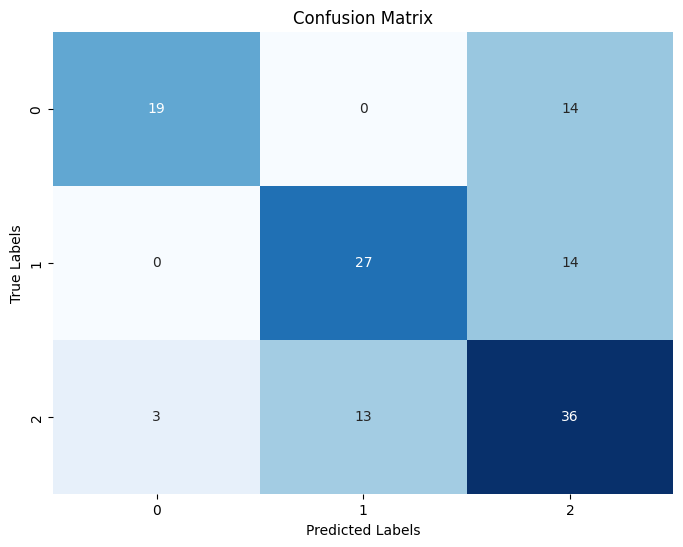

In [115]:
from sklearn._loss.link import MultinomialLogit
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Initialize Logistic Regression
log_clf = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    max_iter=1000000,
    random_state=123
)

# Train the model
log_clf.fit(X_train, y_train)

# Make predictions
y_pred = log_clf.predict(X_test)

# Cross-validation score
cv_score = cross_val_score(log_clf, X_train, y_train, cv=5).mean()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f'Cross-Validation Score: {cv_score:.2%}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


print('\nConfusion Matrix:')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross-Validation Score: 66.86%
Accuracy: 65.87%
Precision: 71.10%
Recall: 65.87%
F1 Score: 65.57%

Confusion Matrix:


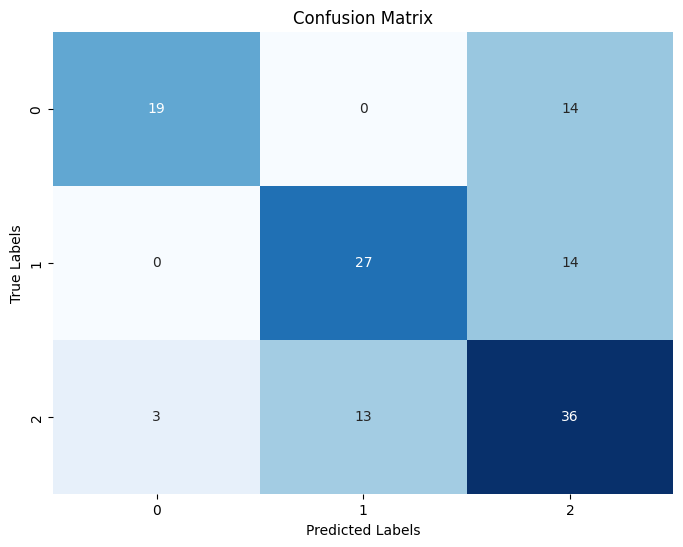

In [116]:
# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_features='sqrt',
    n_jobs=-1,
    random_state=123
)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Cross-validation score
cv_score = cross_val_score(rf_clf, X_train, y_train, cv=5).mean()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f'Cross-Validation Score: {cv_score:.2%}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


print('\nConfusion Matrix:')
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross-Validation Score: 67.27%
Accuracy: 59.52%
Precision: 63.37%
Recall: 59.52%
F1 Score: 59.75%

Confusion Matrix:


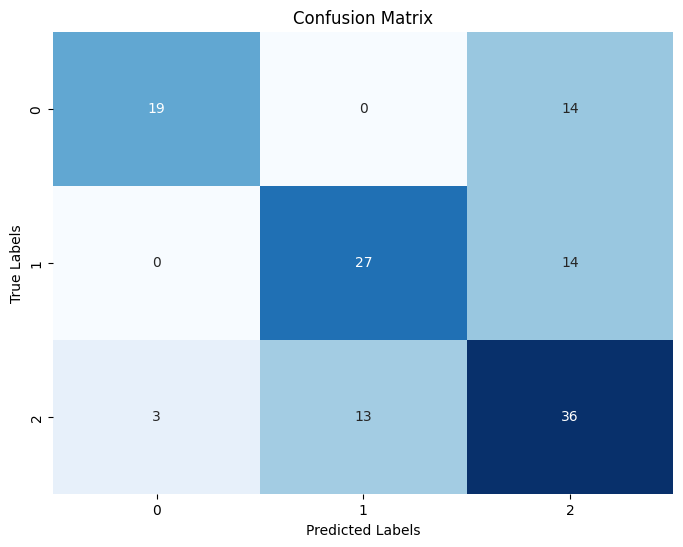

In [117]:
# Initialize RidgeClassifier
rg_clf = RidgeClassifier(
    alpha=1.0,
    copy_X=True,
    fit_intercept=True,
    random_state=123,
    solver='auto',
    tol=0.0001
)

# Train the model
rg_clf.fit(X_train, y_train)

# Make predictions
y_pred = rg_clf.predict(X_test)

# Cross-validation score
cv_score = cross_val_score(rg_clf, X_train, y_train, cv=5).mean()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f'Cross-Validation Score: {cv_score:.2%}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


print('\nConfusion Matrix:')
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross-Validation Score: 69.25%
Accuracy: 61.90%
Precision: 65.64%
Recall: 61.90%
F1 Score: 61.86%

Confusion Matrix:


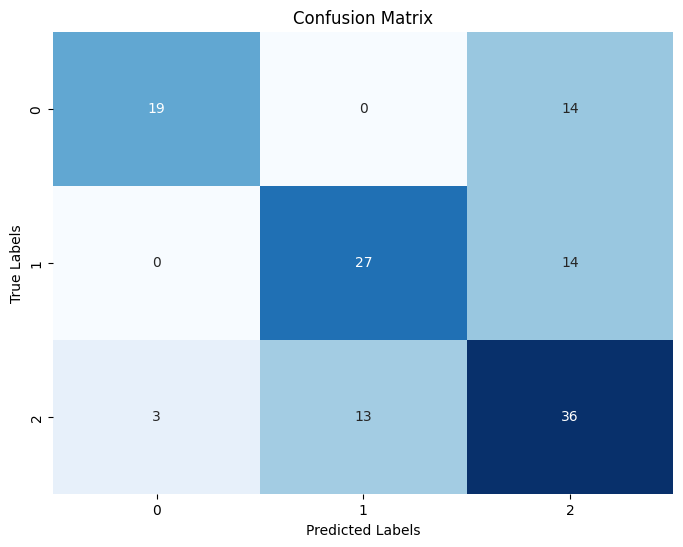

In [118]:
# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=123,
    criterion='friedman_mse',
    loss='log_loss'
)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Cross-validation score
cv_score = cross_val_score(gb_clf, X_train, y_train, cv=5).mean()

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f'Cross-Validation Score: {cv_score:.2%}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


print('\nConfusion Matrix:')
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross-Validation Score: 50.67%
Accuracy: 57.14%
Precision: 64.67%
Recall: 57.14%
F1 Score: 56.18%

Confusion Matrix:


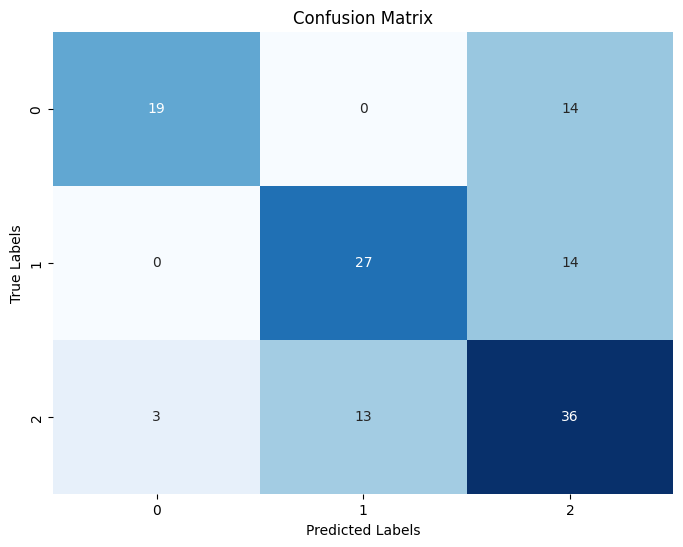

In [119]:
# Initialize the MLPClassifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(15, 10),
    alpha=3,
    learning_rate='adaptive',
    max_iter=100000,
    random_state=42  # Ensure reproducibility
)

# Train the model
mlp_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_clf.predict(X_test)

# Cross-validation score
cv_score = cross_val_score(mlp_clf, X_train, y_train, cv=5).mean()

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f'Cross-Validation Score: {cv_score:.2%}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


print('\nConfusion Matrix:')
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Cross-Validation Score: 63.66%
Accuracy: 58.73%
Precision: 60.81%
Recall: 58.73%
F1 Score: 58.72%

Confusion Matrix:


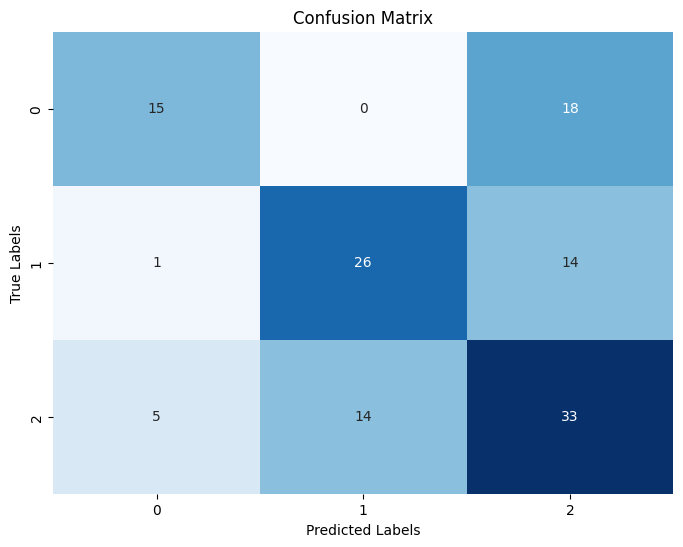

In [124]:
# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(
    criterion='gini',       # Splitting criterion: 'gini' or 'entropy'
    max_depth=None,         # Maximum depth of the tree
    min_samples_split=2,    # Minimum samples required to split a node
    random_state=42         # Ensure reproducibility
)

# Train the model
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_clf.predict(X_test)

# Cross-validation score
cv_score = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print performance metrics
print(f'Cross-Validation Score: {cv_score:.2%}')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')


print('\nConfusion Matrix:')
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Random Forest is the best overall choice due to:
#   The highest test accuracy (65.87%).
#   The best Precision (71.10%).
#   Strong performance in Recall (65.87%) and F1 Score (65.57%).

# LDA is a close second:
#   High Cross-Validation Score (71.26%).
#   Consistent performance across all metrics.
#   Easier to interpret and less computationally intensive than Random Forest.